In [87]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
# df.tail(9)
df['species'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [88]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
#MOdeli Train edirik
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [90]:
#Modelin qurulmasi
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [98]:
#test edek
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("modelin deqiqliyi:{}" .format(accuracy))

modelin deqiqliyi:1.0


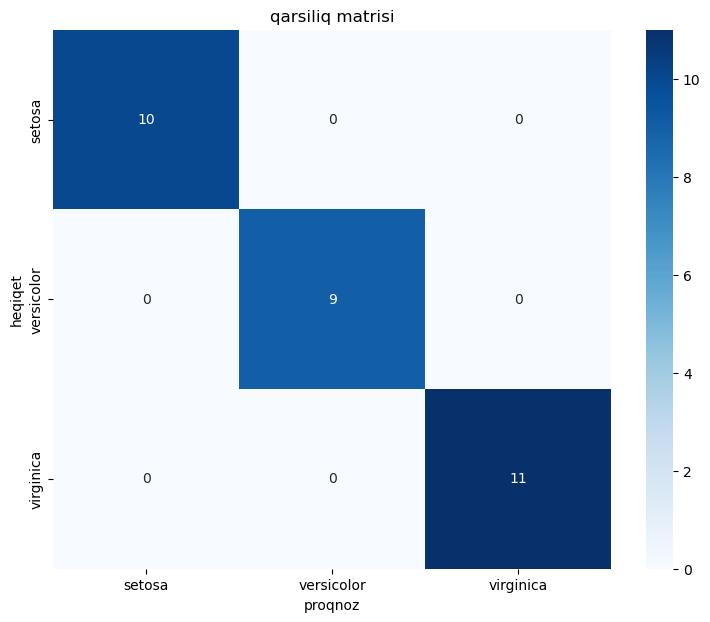

In [100]:
#Confusion matrix yaradirig
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot = True,fmt='d',cmap='Blues', xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel("proqnoz")
plt.ylabel("heqiqet")
plt.title("qarsiliq matrisi")
plt.show()

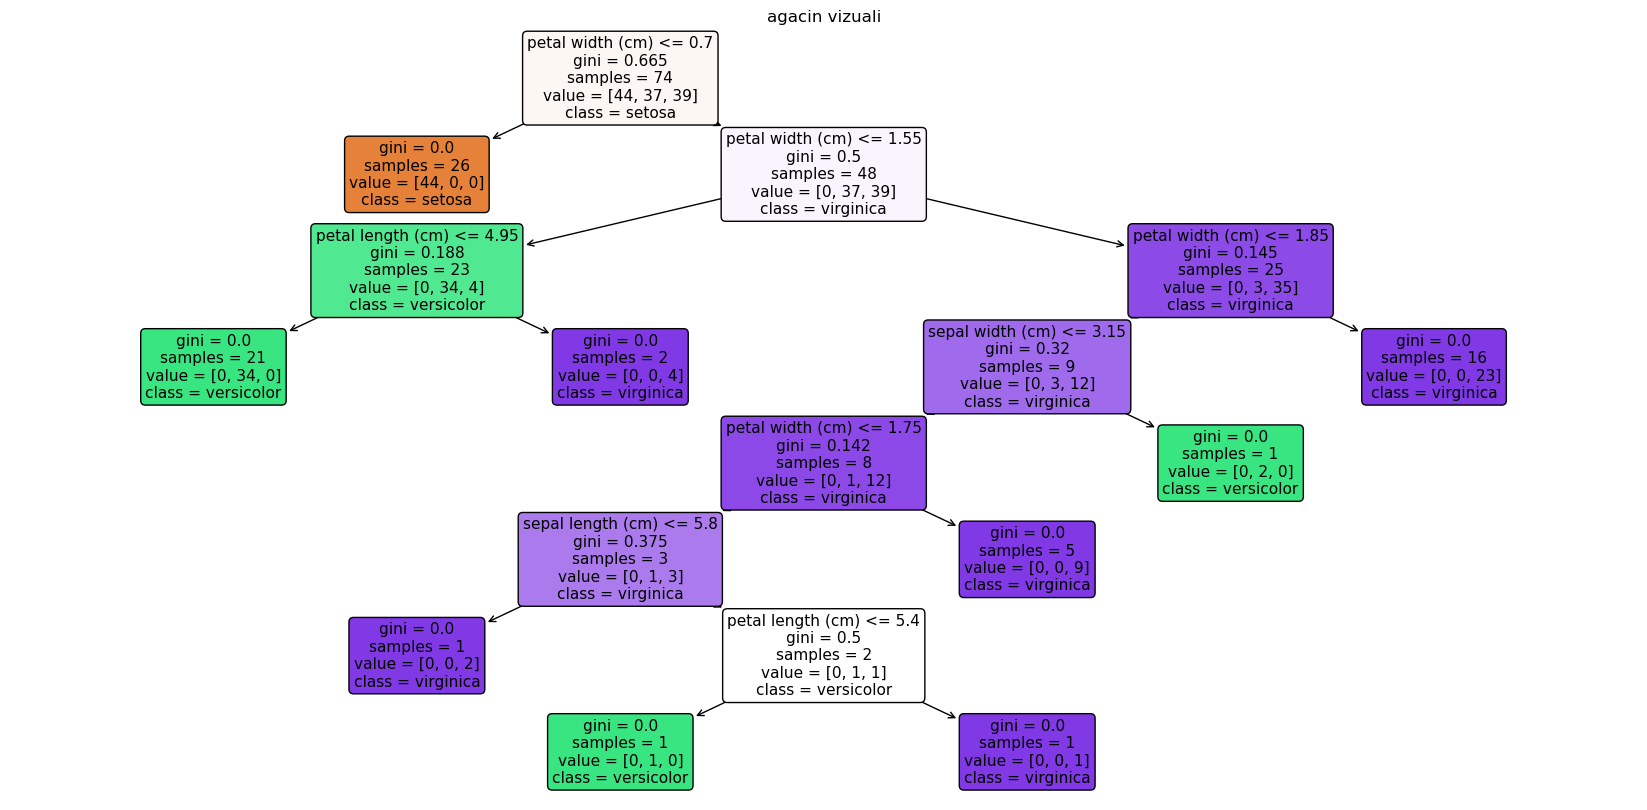

In [93]:
#Agacin vizuallasdiririg
plt.figure(figsize=(21,10))
plot_tree(rf_model.estimators_[0],feature_names=iris.feature_names,class_names=iris.target_names.tolist(),filled=True,rounded=True)
plt.title("agacin vizuali")
plt.show()

In [94]:
#Cross validation istifade ederek neticeleri muqayise edirik
train_cv_scores =  cross_val_score(model,X_train,y_train,cv=3,scoring='accuracy')
mean_train_cv_accuracy = train_cv_scores.mean()
print("The mean accuracy using 3-fold cross validation on training data : ",mean_train_cv_accuracy)

The mean accuracy using 3-fold cross validation on training data :  0.9500000000000001


In [95]:
test_cv_scores =  cross_val_score(model,X_test,y_test,cv=3,scoring='accuracy')
mean_test_cv_accuracy = test_cv_scores.mean()
print("The mean accuracy using 3-fold cross validation on test data : ",mean_test_cv_accuracy)

The mean accuracy using 3-fold cross validation on test data :  0.9666666666666667


In [96]:
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])